Attempting to apply a Gaussian Process, following the example notebook present in this repo

#### Linear Interpolation

This is a basic linear interpolation implementation

0.015    2
0.007    2
0.009    2
0.021    2
0.018    2
        ..
0.051    1
0.049    1
0.046    1
0.043    1
1.730    1
Name: #, Length: 94, dtype: int64

<Axes: >

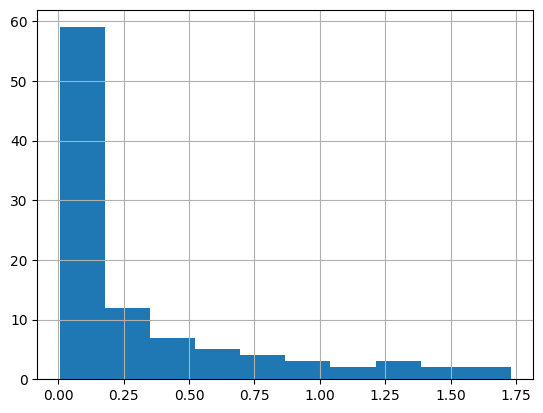

In [16]:
## read in files in lcs_bulla_2022 and only load in the first file as a datafrane

import pandas as pd
import glob as glob
import numpy as np
import os

# read in the files
files = glob.glob('lcs_bulla_2022/*.dat')

time_file = pd.read_csv(files[1], sep='\s+')
# print(time_file)
## print interval of # and step
# print(time_file.columns)
#print(time_file['#'].min(), time_file['#'].max(), time_file['#'].max() - time_file['#'].min())

## print step size of # column
display(time_file['#'].diff().value_counts())
## plot histogram of step size
import matplotlib.pyplot as plt
time_file['#'].diff().hist()

In [ ]:
def interpolate_lightcurve(data,start,stop,step,filter):
    """
    Interpolate lightcurve data to a given time interval
    """
    time = np.arange(start,stop,step)
    interpolated_data = np.interp(time,data['t'],data[filter])
    return time, interpolated_data

In [ ]:
def interp_mjd(data,argData,data_index='time',arg_index='time'):
    '''
    More generalized version of interpToMatch(). Takes an argument for a reference
    DataFrame and a variable number of DataFrames to be interpolated so that
    they match the time sampling of the reference DataFrame. Like interpToMatch(),
    DataFrames must have a 'time' column of an integer or float type.
    Function returns an array containing the reference DataFrame as the first
    item followed by the interpolated DataFrames in the order in which they were
    passed to the function
    '''
    interpArray = []
    interpArray.append(data)
    
    data_indexed = data.set_index(str(data_index))
    data_length = len(data_indexed.index)
    minun = data_indexed.index.min()
    plusle = data_indexed.index.max()
    newIndex = data_indexed.index
    
    arg_indexed = argData.set_index(str(arg_index))
    arg_interp = pd.DataFrame(index=newIndex)
    arg_interp.index.name = arg_indexed.index.name
    for colname, col in arg_indexed.iteritems():
        arg_interp[colname] = np.interp(newIndex,arg_indexed.index,col)
    arg_interp.reset_index(inplace=True)
    return arg_interp